# Flight Price Prediction

In [1]:
###import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
pd.options.display.max_columns = None
import warnings
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Clean_Dataset.csv', sep=',',encoding='windows-1252')
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [4]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#  Exploratory Data Analysis

In [6]:
x= data.groupby(['source_city','destination_city'])['price'].sum().reset_index().sort_values(["price"], ascending = False)
x[0:7]

,source_city,destination_city,price
4,Bangalore,Mumbai,299261197
25,Mumbai,Bangalore,298260354
14,Delhi,Mumbai,295931282
29,Mumbai,Kolkata,282022007
27,Mumbai,Delhi,277303264
24,Kolkata,Mumbai,253178558
10,Delhi,Bangalore,250537591


In [7]:
n=data.groupby(['flight','airline'])['price'].count().reset_index().sort_values(["price"], ascending = False)
n[0:5]

,flight,airline,price
1442,UK-706,Vistara,3235
1454,UK-772,Vistara,2741
1445,UK-720,Vistara,2650
1490,UK-836,Vistara,2542
1477,UK-822,Vistara,2468


> **How does the ticket price vary between Economy and Business class?**

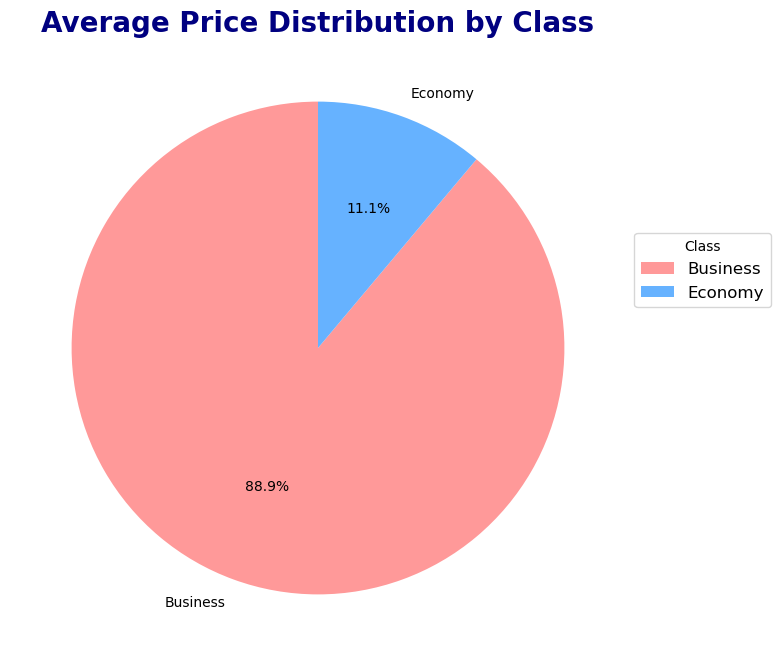

In [8]:
# Define data
class_price_mean = data.groupby(['class'])['price'].mean()

# Define colors for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
class_price_mean.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)

# Adding title and adjusting layout
plt.title('Average Price Distribution by Class', fontsize=20, fontweight='bold', color='navy')
plt.ylabel('')  # Remove y-label
plt.legend(title='Class', loc='upper left', fontsize=12, bbox_to_anchor=(1, 0.7))
plt.show()

> **Does ticket price change based on the departure time and arrival time?**

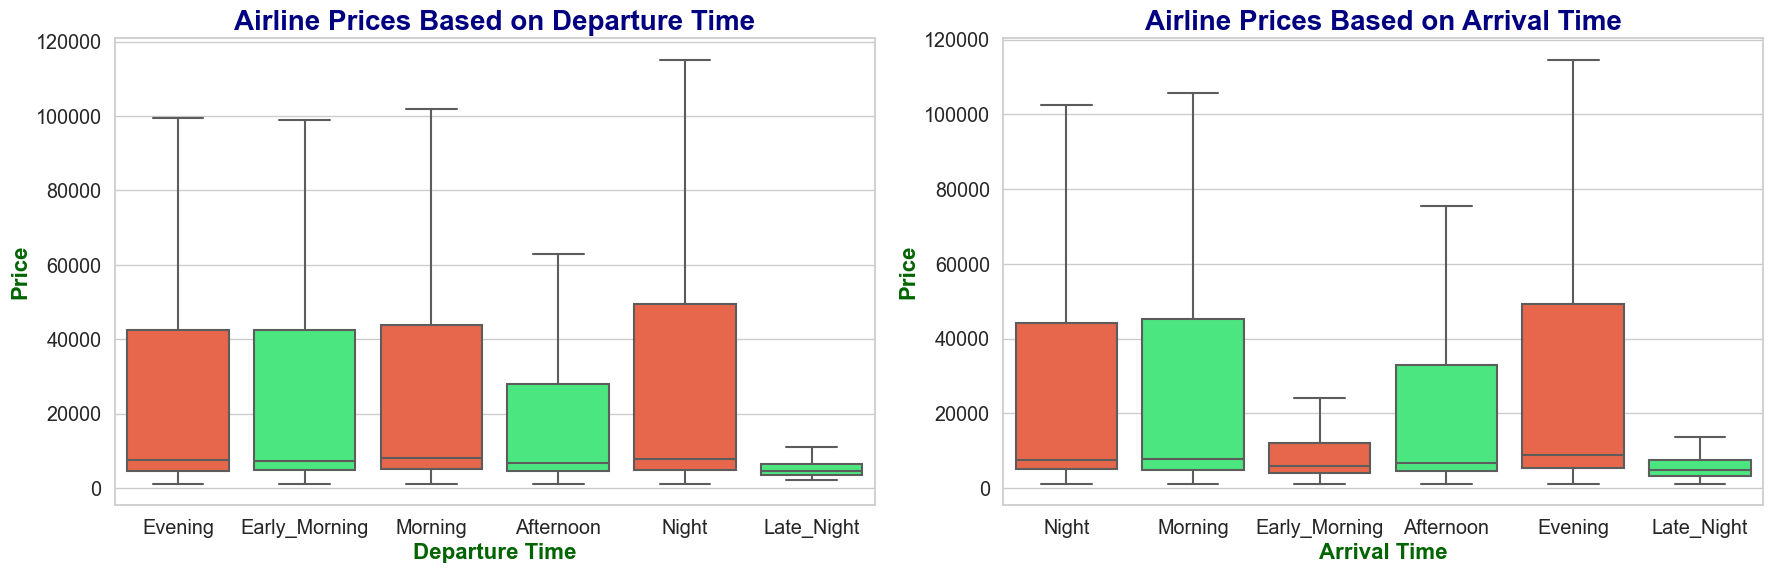

In [9]:
# Set the style
sns.set(style="whitegrid", font_scale=1.3)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Define colors for the box plots
colors = ['#FF5733', '#33FF77']

# Plotting the box plots
sns.boxplot(data=data, x='departure_time', y='price', showfliers=False, ax=axes[0], palette=colors)
axes[0].set_title('Airline Prices Based on Departure Time', fontsize=20, fontweight='bold', color='navy')
axes[0].set_xlabel('Departure Time', fontsize=16, fontweight='bold', color='darkgreen')
axes[0].set_ylabel('Price', fontsize=16, fontweight='bold', color='darkgreen')

sns.boxplot(data=data, x='arrival_time', y='price', showfliers=False, ax=axes[1], palette=colors)
axes[1].set_title('Airline Prices Based on Arrival Time', fontsize=20, fontweight='bold', color='navy')
axes[1].set_xlabel('Arrival Time', fontsize=16, fontweight='bold', color='darkgreen')
axes[1].set_ylabel('Price', fontsize=16, fontweight='bold', color='darkgreen')

# Adjust layout
plt.tight_layout()
plt.show()

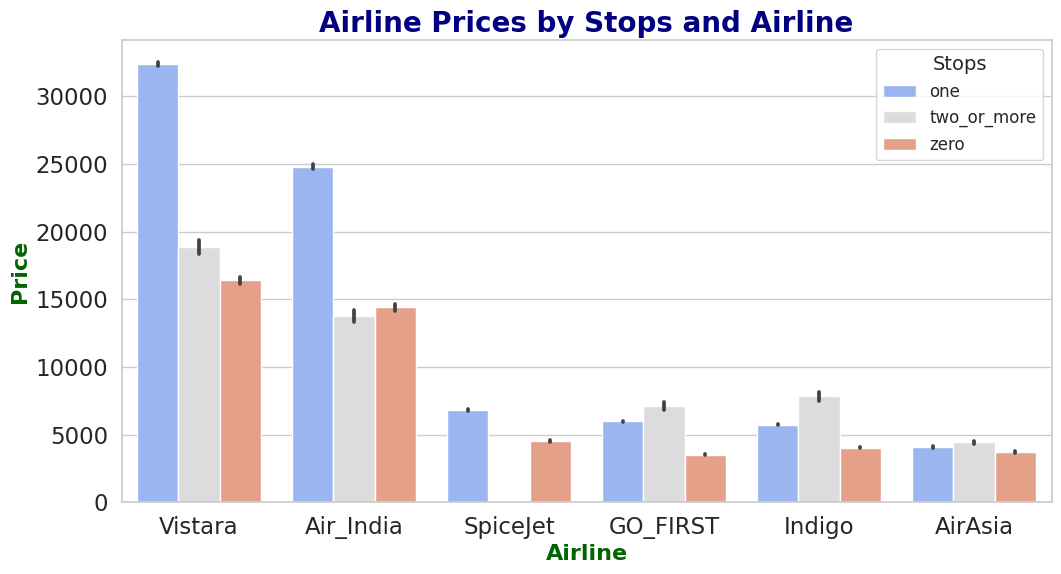

In [15]:
# Set the style
sns.set(style="whitegrid", font_scale=1.5)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y="price", x="airline", hue="stops", data=data.sort_values("price", ascending=False), palette="coolwarm")

# Set title and labels
plt.title('Airline Prices by Stops and Airline', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Airline', fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel('Price', fontsize=16, fontweight='bold', color='darkgreen')

# Adjust legend
plt.legend(title="Stops", fontsize=12, title_fontsize=14)

plt.show()

In [10]:
df=data.copy()

In [11]:
data['source_to_destionation']=data['source_city']+' to '+data['destination_city']
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destionation
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad


# DATA PREPROCESSING

In [14]:
city_count=dict(data['source_city'].value_counts())
city_count

{'Delhi': 61343,
 'Mumbai': 60896,
 'Bangalore': 52061,
 'Kolkata': 46347,
 'Hyderabad': 40806,
 'Chennai': 38700}

In [15]:
def offer_city(count):
    if  count>=60000:
        return('offer5%')
    if   45000 <= count < 60000:
         return('offer7%')
    if   30000<= count <45000:
        return('offer10%')
    else:
        return('no offer')
data['offer_city']=data['source_city'].map(city_count).apply(offer_city)    

In [16]:
duplicated=data.duplicated()
duplicated.sum()

0

In [17]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [18]:
from sklearn.preprocessing import LabelEncoder
airline = LabelEncoder()
stops=LabelEncoder()
clas=LabelEncoder()

In [19]:
df['airline']=airline.fit_transform(df['airline'])
df['source_city']=airline.fit_transform(df['source_city'])
df['destination_city']=airline.fit_transform(df['destination_city'])
df['departure_time']=airline.fit_transform(df['departure_time'])
df['arrival_time']=airline.fit_transform(df['arrival_time'])
df['stops']=stops.fit_transform(df['stops'])
df['class']=clas.fit_transform(df['class'])

In [43]:
#df.drop(['Unnamed: 0'],axis=1,inplace=True)
#df.drop(['flight'],axis=1,inplace=True)

## Statistical Analysis

In [23]:
from tabulate import tabulate
#df.drop('offer',axis=1,inplace=True)
def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(df)


Statistical Moments:

+------------------+----------+----------+----------------------+------------+------------+
|                  |   Mean   |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+==================+==========+==========+======================+============+============+
|     airline      | 3.10487  |    3     |       1.83326        | -0.211318  |  -1.59204  |
+------------------+----------+----------+----------------------+------------+------------+
|   source_city    | 2.57759  |    2     |       1.75176        | -0.033006  |  -1.29023  |
+------------------+----------+----------+----------------------+------------+------------+
|  departure_time  | 2.41734  |    2     |       1.75428        |  0.14775   |  -1.42183  |
+------------------+----------+----------+----------------------+------------+------------+
|      stops       | 0.284168 |    0     |       0.665825       |  2.04288   |   2.3771   |
+------------------+----------+----------+---------------

## Descriptive Analysis

In [43]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


## HeatMap

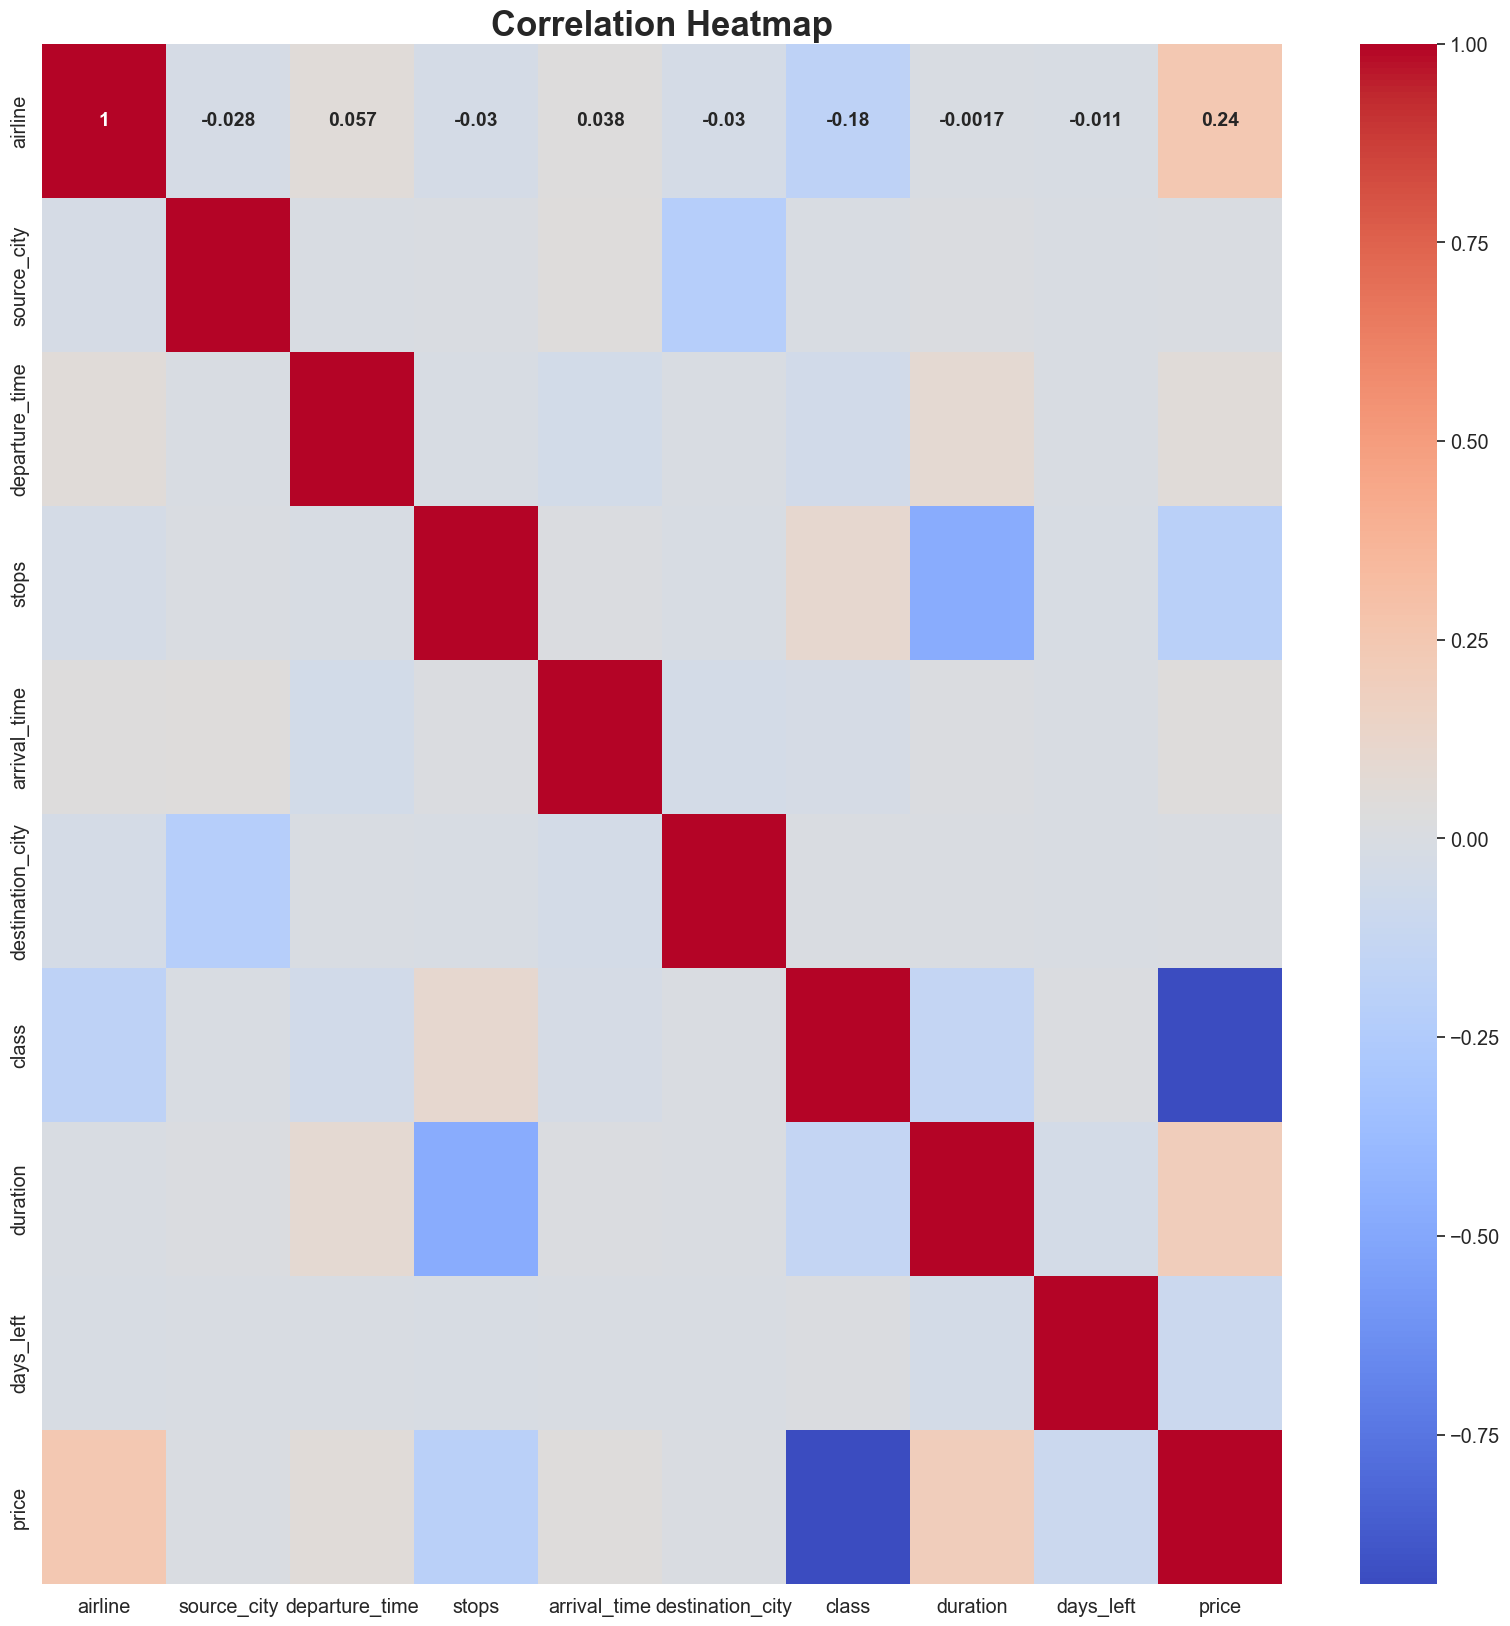

In [24]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 14, "weight": "bold"}, cmap='coolwarm')

# Set title
plt.title('Correlation Heatmap', fontsize=25, fontweight='bold')

plt.show()


In [25]:
df.mean()

airline                 3.104873
source_city             2.577592
departure_time          2.417337
stops                   0.284168
arrival_time            3.074086
destination_city        2.588303
class                   0.688536
duration               12.221021
days_left              26.004751
price               20889.660523
dtype: float64

In [26]:
x_temp = df.drop(['price'],axis=1).values
y=df.price.values

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming x_temp is a NumPy array
scaler = MinMaxScaler().fit_transform(x_temp)
X = pd.DataFrame(scaler)

# MODEL BUILDING

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [30]:
X_train.shape

(210107, 9)

In [53]:
y_test.shape

(90046,)

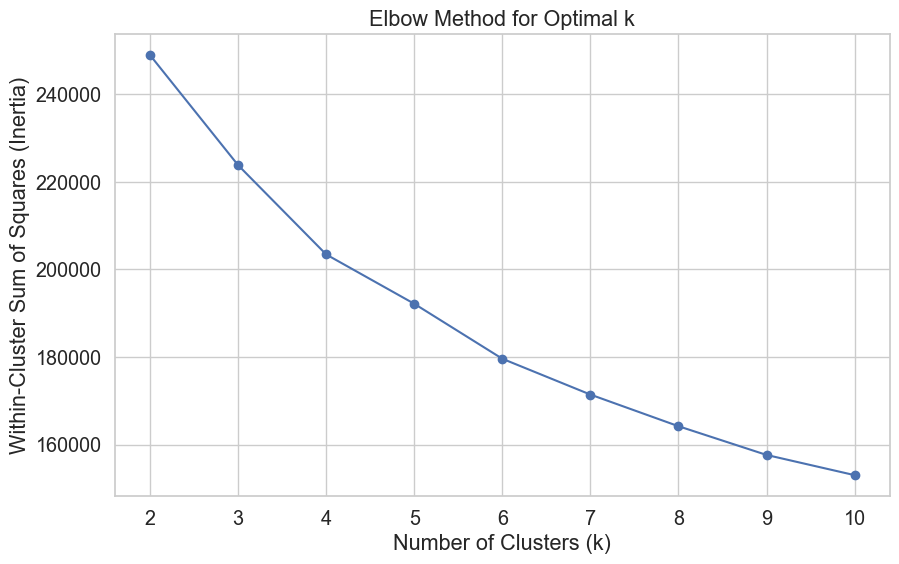

In [31]:
# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
#plt.savefig('5.png', dpi=300)
plt.show()

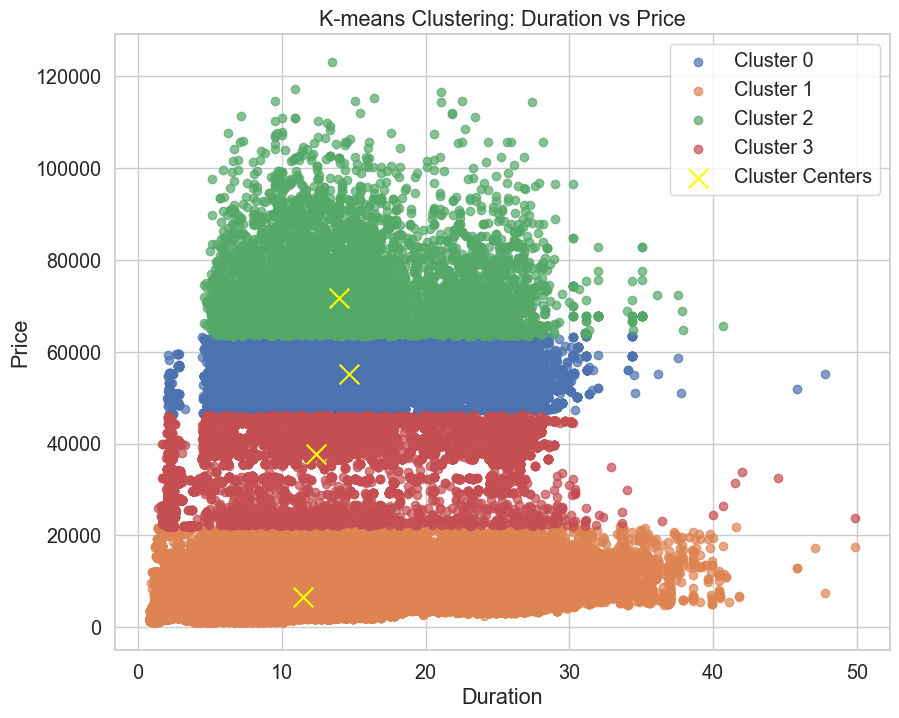

In [33]:
# Perform K-means clustering
km = KMeans(n_clusters=4, random_state=42)  # Specify the number of clusters
df['cluster'] = km.fit_predict(df[['duration', 'price']])  # Fit K-means and assign cluster labels

# Plot clusters with cluster centers
plt.figure(figsize=(10, 8))

# Plot each cluster using a different color
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['duration'], cluster_data['price'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='yellow', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: Duration vs Price')
plt.xlabel('Duration')
plt.ylabel('Price')

# Add legend
plt.legend()
plt.grid(True)
#plt.savefig('6.png', dpi=300)
plt.show()

In [34]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
LR = linear_model.LinearRegression()

LR.fit(X_train,y_train)
print('train score',LR.score(X_train,y_train))
print('test score',LR.score(X_test,y_test))
y_pred = LR.predict(X_test)
R2_LR=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))

train score 0.9045877099195366
test score 0.9046540517018563
r2 score 0.9046540517018563


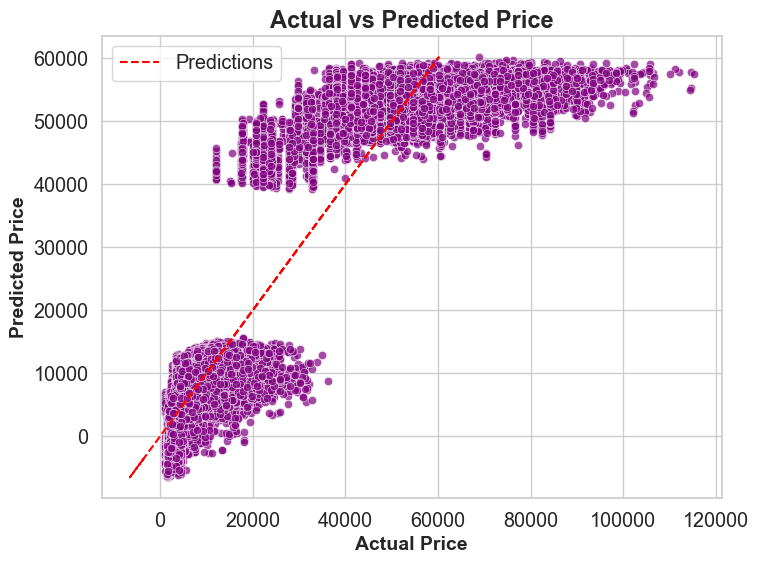

In [35]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.legend()
#plt.savefig('o7.png', dpi=300)
plt.show()

In [60]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
print('train score',xgb.score(X_train,y_train))
print('test score',xgb.score(X_test,y_test))
y_pred = xgb.predict(X_test)
R2_XGB=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))

train score 0.9775295914981297
test score 0.9756817530708662
r2 score 0.9756817530708662


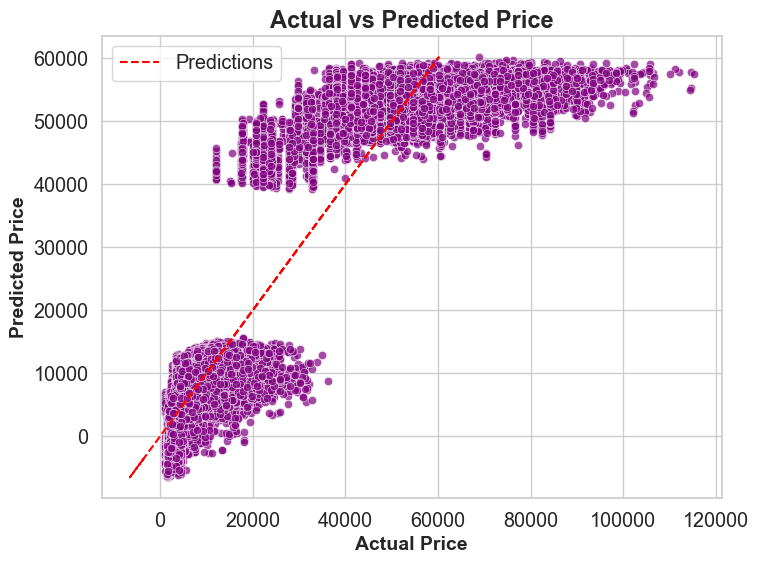

In [36]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.legend()
#plt.savefig('o7.png', dpi=300)
plt.show()

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=9)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Accuracy of train model:',rf_model.score(X_train, y_train))
print('accuracy of test model',rf_model.score(X_test,y_test))
R2_RF=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))

Accuracy of train model: 0.9644874256654381
accuracy of test model 0.9630663164723205
r2 score 0.9630663164723205


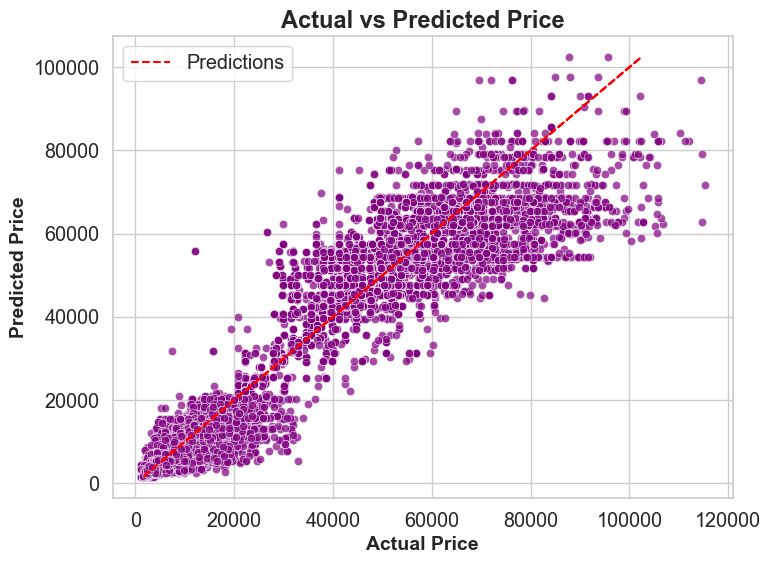

In [38]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.legend()
#plt.savefig('o7.png', dpi=300)
plt.show()

In [39]:
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor  

Rtree = DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10, max_features=9, random_state=42)
Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)
print('Accuracy of train model:',Rtree.score(X_train, y_train))
print('accuracy of test model',Rtree.score(X_test,y_test))
R2_DT=r2_score(y_test,y_pred)
print('r2 score',r2_score(y_test,y_pred))

Accuracy of train model: 0.9616423646350241
accuracy of test model 0.9599060841581157
r2 score 0.9599060841581157


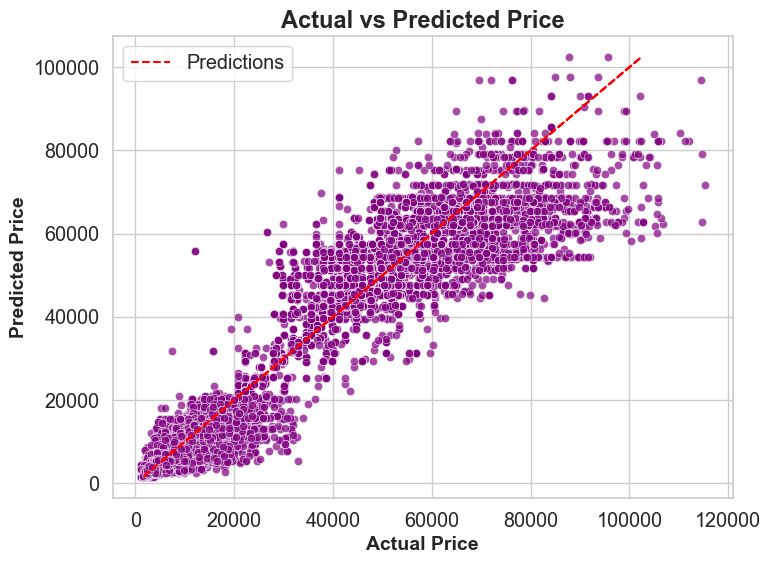

In [40]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.legend()
#plt.savefig('o7.png', dpi=300)
plt.show()